## Purpose
- This exercise with the objective of understanding NY city taxis' hot pick up and drop off areas. 
- I will focus mainly on data exploratory and visualisation in this exercise
- Data reference https://www.kaggle.com/c/nyc-taxi-trip-duration/data

## 0.Preparation
 
- Import libraries
- Import datasets


In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
cwd = os.getcwd()
cab_data0 = pd.read_csv(cwd + r'\cab_data.csv')

## 1.Overview of datasets
#### 1.1 Datasets' structure and data type
#### 1.2 Missing values
#### 1.3 Data consistency
#### 1.4 Any outliers to be removed?

==============================

#### 1.1 Datasets' structure and data type
- Summary of dataset's content/variables and their data type
- Quick description of variables' distribution
- Look of first lines

In [3]:
print(cab_data0.info())
print('='*20)
print(cab_data0.describe(include = 'all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB
None
               id     vendor_id      pickup_datetime     dropoff_datetime  \
count     1458644  1.458644e+06              1458644              1458644   
u

In [4]:
cab_data0.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


- To change data type for the pick up and drop off datetime

In [5]:
cab_data = cab_data0.copy()
cab_data['pickup_datetime']= pd.to_datetime(cab_data0['pickup_datetime'])
cab_data['dropoff_datetime']= pd.to_datetime(cab_data0['dropoff_datetime'])
#cab_data['flag'] = (cab_data['store_and_fwd_flag'] == 'Y')
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


#### 1.2 Missing values
> There is no missing data in the dataset

In [6]:
cab_data.isnull().sum()
#cab_data.isnull().any().any()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

#### 1.3 Data consistency
- check trip_duration with pick up and drop off time
> no data discrepancy

In [7]:
(pd.to_numeric(cab_data['trip_duration']) != (cab_data['dropoff_datetime']-cab_data['pickup_datetime']).dt.total_seconds().astype(int)).sum()

0

#### 1.4 Any outliers to be removed?
##### 1.4.1 pick up and drop off geo data
##### 1.4.2 trip duration

===============


##### 1.4.1 pick up and drop off geo data
> keep only journeys within New York i.e. pick up and drop off points within an area limited by latitude and longitude with mean +- std*3 interval

pick up latitude:
 34.359695434570305 40.652277349618835 40.84956446716463 51.88108444213867


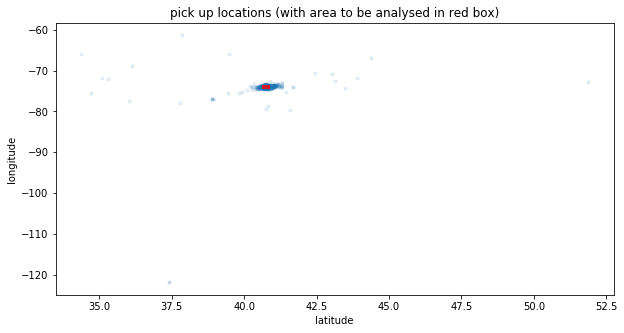

pick up latitude:
 32.1811408996582 40.64412784808329 40.859471181717105 43.92102813720703


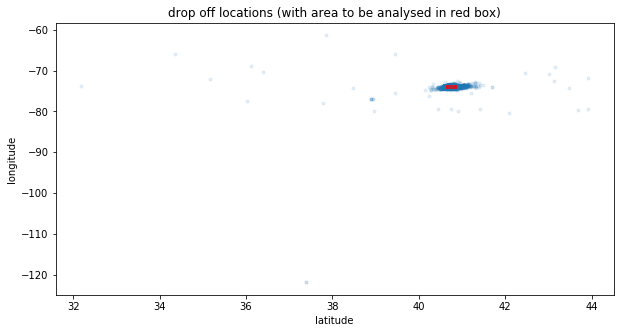

In [8]:
# take mean +- std*3 interval, i.e. 99.7% of data
pickup_latitude_lmin = cab_data['pickup_latitude'].mean()-cab_data['pickup_latitude'].std()*3
pickup_latitude_lmax = cab_data['pickup_latitude'].mean()+cab_data['pickup_latitude'].std()*3
pickup_longitude_lmin = cab_data['pickup_longitude'].mean()-cab_data['pickup_longitude'].std()*3
pickup_longitude_lmax = cab_data['pickup_longitude'].mean()+cab_data['pickup_longitude'].std()*3
print('pick up latitude:\n',cab_data['pickup_latitude'].min(),pickup_latitude_lmin,pickup_latitude_lmax,cab_data['pickup_latitude'].max())
plt.figure(figsize=(10,5))
plt.plot(cab_data['pickup_latitude'],cab_data['pickup_longitude'],'.',alpha=0.1)
#plt.scatter(x=cab_data['pickup_latitude'],y=cab_data['pickup_longitude'],alpha=0.4)  #slower than .plot(x,y,'.')
plt.title('pick up locations (with area to be analysed in red box)')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.plot([pickup_latitude_lmin,pickup_latitude_lmin],[pickup_longitude_lmin,pickup_longitude_lmax],color = 'red')
plt.plot([pickup_latitude_lmin,pickup_latitude_lmax],[pickup_longitude_lmin,pickup_longitude_lmin],color = 'red')
plt.plot([pickup_latitude_lmax,pickup_latitude_lmax],[pickup_longitude_lmin,pickup_longitude_lmax],color = 'red')
plt.plot([pickup_latitude_lmin,pickup_latitude_lmax],[pickup_longitude_lmax,pickup_longitude_lmax],color = 'red')
plt.show()

dropoff_latitude_lmin = cab_data['dropoff_latitude'].mean()-cab_data['dropoff_latitude'].std()*3
dropoff_latitude_lmax = cab_data['dropoff_latitude'].mean()+cab_data['dropoff_latitude'].std()*3
dropoff_longitude_lmin = cab_data['dropoff_longitude'].mean()-cab_data['dropoff_longitude'].std()*3
dropoff_longitude_lmax = cab_data['dropoff_longitude'].mean()+cab_data['dropoff_longitude'].std()*3
print('pick up latitude:\n',cab_data['dropoff_latitude'].min(),dropoff_latitude_lmin,dropoff_latitude_lmax,cab_data['dropoff_latitude'].max())
plt.figure(figsize=(10,5))
plt.plot(cab_data['dropoff_latitude'],cab_data['dropoff_longitude'],'.',alpha=0.1)
plt.title('drop off locations (with area to be analysed in red box)')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.plot([dropoff_latitude_lmin,dropoff_latitude_lmin],[dropoff_longitude_lmin,dropoff_longitude_lmax],color = 'red')
plt.plot([dropoff_latitude_lmin,dropoff_latitude_lmax],[dropoff_longitude_lmin,dropoff_longitude_lmin],color = 'red')
plt.plot([dropoff_latitude_lmax,dropoff_latitude_lmax],[dropoff_longitude_lmin,dropoff_longitude_lmax],color = 'red')
plt.plot([dropoff_latitude_lmin,dropoff_latitude_lmax],[dropoff_longitude_lmax,dropoff_longitude_lmax],color = 'red')
plt.show()

In [9]:
cab_data_NY = cab_data.loc[(cab_data['pickup_longitude']<pickup_longitude_lmax)&(cab_data['pickup_longitude']>pickup_longitude_lmin)&
                          (cab_data['pickup_latitude']<pickup_latitude_lmax)&(cab_data['pickup_latitude']>pickup_latitude_lmin)&
                          (cab_data['dropoff_longitude']<dropoff_longitude_lmax)&(cab_data['dropoff_longitude']>dropoff_longitude_lmin)&
                          (cab_data['dropoff_latitude']<dropoff_latitude_lmax)&(cab_data['dropoff_latitude']>dropoff_latitude_lmin),
                          cab_data.columns.values]

##### 1.4.2 trip duration
> keep only trip duration more than 1 minute and less than 10 hours

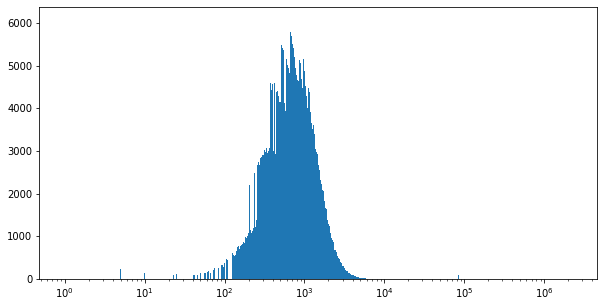

In [10]:
bins = np.arange(cab_data_NY['trip_duration'].min(),cab_data_NY['trip_duration'].max(),1000)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),num=len(bins))
plt.figure(figsize = (10,5))
plt.hist(cab_data_NY['trip_duration'],bins = logbins)
plt.xscale('log')

In [11]:
print('trip duration:\n','min',round(cab_data_NY['trip_duration'].min()/60,2),'minutes, and max',round(cab_data_NY['trip_duration'].max()/3600,2),'hours')

m = cab_data_NY['trip_duration'].mean()
std = cab_data_NY['trip_duration'].std()
print('mean +- std*3: [', round((m-std*3)/3600,2),', ',round((m+std*3)/3600,2),'] hours')

trip duration:
 min 0.02 minutes, and max 618.78 hours
mean +- std*3: [ -3.12 ,  3.62 ] hours


In [12]:
cab_data_NY_trip = cab_data_NY.loc[(cab_data_NY['trip_duration']>60)&(cab_data_NY['trip_duration']<60*60*10),
                          cab_data.columns.values]
# rename the dataframe for simplicity
trip_df = cab_data_NY_trip

## 2. Hot areas/locations
#### 2.1 visualise pick up/drop off locations by prequency
#### 2.2 identify hot areas (K-means clustered area)
#### 2.3 identify top ranking pick up locations (longitude-latitude box)

==============================


#### 2.1 visualise pick up/drop off locations by prequency


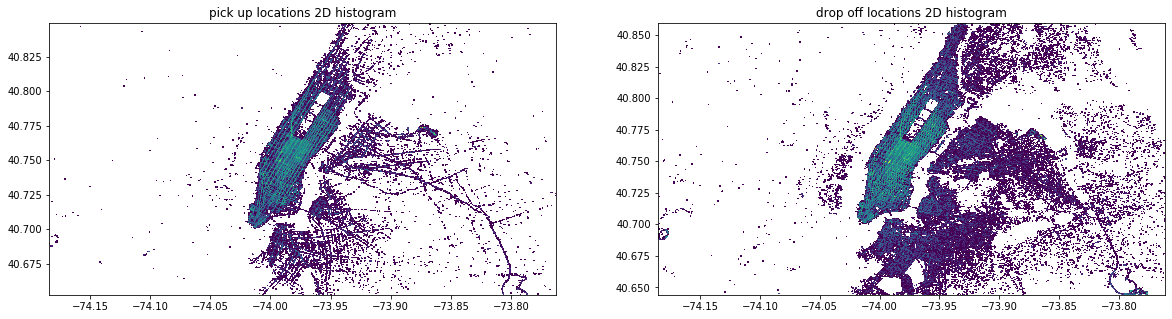

In [13]:
fig,ax = plt.subplots(1,2,figsize = (20,5))
ax[0].hist2d(trip_df['pickup_longitude'],trip_df['pickup_latitude'],bins = (1000,1000),norm=LogNorm()) # important to use norm = LogNorm() in order to differenciate 
ax[0].set_title('pick up locations 2D histogram')
ax[1].hist2d(trip_df['dropoff_longitude'],trip_df['dropoff_latitude'],bins = (1000,1000),norm=LogNorm()) 
ax[1].set_title('drop off locations 2D histogram')
plt.show()

#### 2.2 identify hot areas (K-means clustered area)
> Take pick up data as example, drop off data can be treated the same way  
> Due to computational capacity consideration, only sample 10,000 rides among the total pick up dataset

In [14]:
# take only pick-up data as illustration
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler

perm = np.random.permutation(trip_df.index)
samples = perm[:10000]
pickup_df = trip_df.loc[samples,['pickup_longitude','pickup_latitude']]

# Standardize the data
scaler = MinMaxScaler().fit(pickup_df)
pickup_std = scaler.transform(pickup_df)
#plt.plot(pickup_std[:,0],pickup_std[:,1],'.',alpha = 0.2)

In [15]:
n_clusters = 20
model = KMeans(n_clusters=n_clusters)
predict = model.fit_predict(pickup_std)
centroids_std = model.cluster_centers_
centroids = scaler.inverse_transform(centroids_std)
#pickup_df.head(5)

In [16]:
number, freq = np.unique(predict,return_counts=True)
rank = pd.DataFrame({'number':number,'frequency': freq})
rank.sort_values(by='frequency',ascending = False)
top5 = rank[:5].number

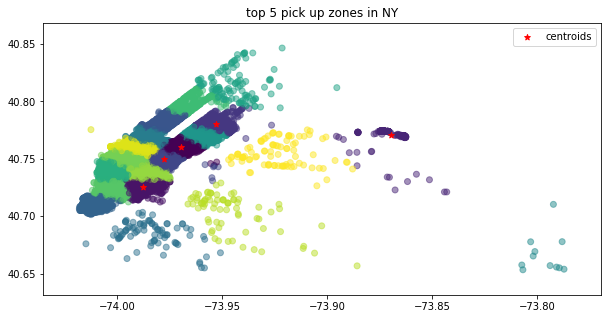

In [17]:
plt.figure(figsize=(10,5))
plt.scatter(pickup_df['pickup_longitude'],pickup_df['pickup_latitude'],alpha = 0.5,c=predict)
plt.scatter(centroids[top5,0],centroids[top5,1],marker = '*',c='red',label='centroids')
plt.legend()
plt.title('top 5 pick up zones in NY')
plt.show()

#### 2.3 identify top ranking pick up locations (longitude-latitude box)

In [18]:
pickup_list = ['pickup_latitude','pickup_longitude']
lmin = [pickup_latitude_lmin,pickup_longitude_lmin]
N = 100
for i,l in enumerate(pickup_list):
    #print(i)
    step = (trip_df[l].max()-trip_df[l].min())/N
    trip_df[l+'_z'] = trip_df[l]
    trip_df[l+'_z'] = trip_df[l+'_z'].apply(lambda x: int((x- lmin[i])/step)*step + lmin[i])
# trip_df[pickup_list+['pickup_latitude_z','pickup_longitude_z','id']].head(5)

In [19]:
pickup_pass = trip_df[['pickup_latitude_z','pickup_longitude_z','id']].groupby(['pickup_latitude_z','pickup_longitude_z']).count().rename(columns = {'id':'freq'}).sort_values(by='freq',ascending=False)
pickup_pass[:10]


,,freq
pickup_latitude_z,pickup_longitude_z,
40.748921,-73.992249,20013
40.772588,-73.874196,15649
40.768644,-73.865764,14280
40.750893,-73.979600,13985
40.754838,-73.992249,12258
40.750893,-73.996465,11670
40.754838,-73.975384,9890
40.762727,-73.975384,9728
40.739059,-74.009113,9347


- Pick up points's popularity in terms of # rides
> No.1 40.748921	-73.992249: Pennsylvania station  
> No.2 40.772588	-73.874196: LaGuardia Airport  
> No.3 40.768644	-73.865764: LaGuardia Airport  
> No.4 40.750893	-73.979600: MidTown Manhattan - Grand Central Terminal  
> No.5 40.754838	-73.992249: MidTown Manhattan  
> No.6 40.750893	-73.996465: MidTown Manhattan - Pennsylvania station  
> No.7 40.754838	-73.975384: MidTown Manhattan - Grand Central Terminal  
> No.8 40.762727	-73.975384: MidTown Manhattan  
> No.9 40.739059	-74.009113: Pier 53, Whitney Museum of American Art  
> No.10 40.766671	-73.983816: Time Warner Center

Text(0.5, 1.0, 'pick up locations 2D histogram')

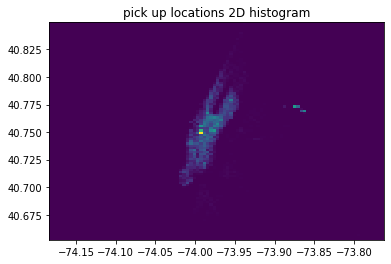

In [20]:
plt.hist2d(trip_df['pickup_longitude'],trip_df['pickup_latitude'],bins = (N,N)) 
plt.title('pick up locations 2D histogram')
